In [70]:
from glob import glob
import seaborn as sns
import nibabel as nib
import numpy as np 
from nilearn import image, plotting
import json
import os.path as osp
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels
import statsmodels.formula.api as smf
%matplotlib inline
sns.set(rc={'axes.facecolor':'lightgray', 'figure.facecolor':'white'})

# First with TBSS images

In [258]:
mds = glob('/home/grg/tbss_subjects/*L2.nii.gz')
skel = np.array(nib.load('/home/grg/tbss_fmodel/stats/mean_FA_skeleton.nii.gz').dataobj)
ages = json.load(open('/home/grg/spm/data/age.json'))
apoe = json.load(open('/home/grg/spm/data/apoe_groups.json'))
gender = json.load(open('/home/grg/spm/data/genders.json'))
educ = json.load(open('/home/grg/spm/data/educyears.json'))

data = []
for each in mds:    
    md = np.array(nib.load(each).dataobj)
    mean = md[skel>0.01].mean()
    subject = osp.basename(each).split('_')[1]
    print subject
    data.append((subject, mean, ages[subject[:5]]/365.25, apoe[subject], educ[subject], gender[subject]))

10117
13235
13214
10737
12502
10900
66164
12841
10166
66048
11196
10703
12479
55539
12172
66309
10251
11184
13242
10298
10613
11620
12133
11592
21039
11007
10419
12767
10811
12445
10988
13345
10029
12484
10282
10822
11222
12711
10015
12975
10035
10024
10576
12765
44046
21051
12079
11691
10226
10170
12947
11630
10436
11038
10144
11882
12245
21002
10855
11407
12636
10070
10156
11063
10036
11646
11133
11436
21130
10846
12483
10065
12582
11144
10118
11225
13083
12067
10541
77179
10418
12699
10013
12304
66085
11245
10042
10180
12271
10496
13070
11254
10322
12930
10538
13035
77252
11939
10645
11137
10334
55216
11195
10034
11291
13061
12391
11262
55630
10212
11737
12787
11850
13169
10099
11019
11045
44660
11550
10225
10326
13138
12279
12963
10330
44057
12874
11414
12812
10367
11152
66125
77195
66492
13215
21092
10053
10239c


KeyError: '10239c'

In [274]:
df

,roi,age,apo,educyears,gender,group
subject,,,,,,
10117,0.000988,63.008898,2,17,0,0
13235,0.000961,56.177960,0,8,0,0
13214,0.000964,48.290212,2,13,0,0
10737,0.001007,49.180014,0,15,0,0
12502,0.001055,61.765914,4,12,1,2
10900,0.001102,65.711157,2,10,0,0
66164,0.000960,65.185489,1,18,1,1
12841,0.000877,48.418891,0,8,0,0
10166,0.000991,48.947296,2,11,0,0


In [283]:
def load_md(fp):
    df = pd.read_excel(fp)
    subjects = df['subject'].tolist()
    df = df.set_index('subject')

    #d = {'apoe23':0, 'apoe24':1, 'apoe33':0, 'apoe34':1, 'apoe44':2}
    d = {0:0, 1:1, 2:0, 3:1, 4:2}

    ht = {0:1, 1:2, 2:1, 3:2, 4:1}
    groups = [d[e] for e in df['apo'].values]

    df['group'] = pd.Series(groups, index=subjects)
    return df

Model used for correction: roi ~ 1 + gender + educyears + apo
Model used for correction: roi ~ 1 + gender + educyears + apo
Region: 
Region: 


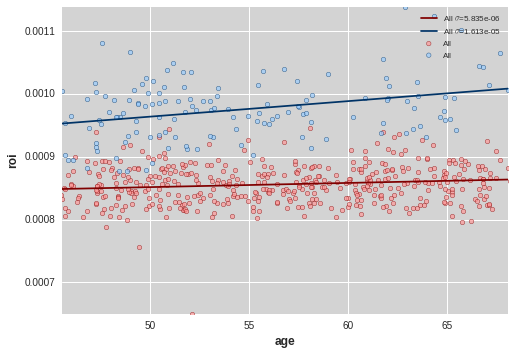

In [313]:
df_dartel = load_md('/tmp/mean_MD_dartel.xls').dropna()
df_tbss = load_md('/tmp/mean_MD.xls').dropna()

%run /home/grg/git/alfa/nilearn-helper.py
%run /home/grg/git/alfa/roicollect.py
#sns.boxplot(x='groups', y='mean_MD', data=df, showfliers=False)

#groups = get_groups(df, )
df_dartel['roi'] = correct(df_dartel)
df_tbss['roi'] = correct(df_tbss)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
set_figaxes(df_tbss, ylim=[df_dartel['roi'].min(), df_tbss['roi'].max()])

plot_region(df_dartel, '', ['All'], order=1, ax=ax)
plot_region(df_tbss, '', ['All'], order=1, ax=ax, c='toto')
#sns.boxplot(x='group', y='roi', data=df, showfliers=False)#, ax=ax)
#df = df.dropna()
#boxplot_region(df, ['HO','HT','NC'])

dartel quadratic aic= -8995.86168923 bic= -8983.20588888
dartel linear aic= -8996.34771512 bic= -8987.91051489
tbss quadratic aic= -2339.36106155 bic= -2330.60111877
tbss linear aic= -2340.32947673 bic= -2334.48951488


# Now with DARTEL images

In [264]:
mds = sorted(glob('/home/grg/dartel_csf.5/rswr*_MD_t1space_wo_csf_nohdr.nii'))
#skel = sorted(glob('/home/grg/data/ALFA_DWI/*/T1/*_mabonlm_nobias_spm_c2.nii'))
ages = json.load(open('/home/grg/spm/data/age.json'))
apoe = json.load(open('/home/grg/spm/data/apoe_groups.json'))
educ = json.load(open('/home/grg/spm/data/educyears.json'))
gender = json.load(open('/home/grg/spm/data/genders.json'))

data = []
for each in mds:    
    #md = np.array(nib.load(each).dataobj)
    subject = osp.basename(each).split('_')[0][4:]
    print subject
    skelfp = '/home/grg/data/templates/MNI_AAL/MNI_T1_seg_2.nii.gz'
    # glob('/home/grg/data/ALFA_DWI/%s*/T1/%s*_mabonlm_nobias_spm_c2.nii'%(subject, subject))[0]
    #image.resample_to_img(each, skelfp).to_filename('/tmp/teeesst.nii.gz')
    md = np.array(nib.load(each).dataobj)
    skel = np.array(nib.load(skelfp).dataobj)
    mean = md[skel>0.01].mean()
    print mean
    data.append((subject, mean, ages[subject[:5]]/365.25, apoe[subject], educ[subject], gender[subject]))

df = pd.DataFrame(data, columns=['subject', 'roi', 'age', 'apo', 'educyears', 'gender'])
df.to_excel('/tmp/mean_MD_dartel.xls')
df.head()

10013
0.000803078
10015
0.000903842
10016
0.000815249
10023
0.000846521
10024
0.000880902
10025
0.000821792
10026
0.000839239
10028
0.000862139
10029
0.000847982
10034
0.000842253
10035
0.000825732
10036
0.000886464
10038
0.000871669
10040
0.000909516
10041
0.000815894
10042
0.000862737
10049
0.000889316
10051
0.000886537
10052
0.000859474
10053
0.000858774
10056
0.000868197
10065
0.000847915
10070
0.000861453
10071
0.000805527
10081
0.000880744
10090
0.000858479
10096
0.00094524
10099
0.000885283
10102
0.000855912
10106
0.000886683
10108
0.000848911
10117
0.000857764
10118
0.000866308
10134
0.000836692
10144
0.000868438
10150
0.000836771
10151
0.000845446
10156
0.000833625
10158
0.000832036
10160
0.00086361
10162
0.000836652
10166
0.000880331
10170
0.000830705
10178
0.000930228
10180
0.000820001
10182
0.000849002
10199
0.00085866
10200
0.000876952
10212
0.000868673
10213
0.000832982
10217
0.000815728
10225
0.000822936
10226
0.000893113
10235
0.000871713
10242
0.000885162
10245
0.00084

,subject,roi,age,apo,educyears,gender
0,10013,0.000803,55.414100,2,11,0
1,10015,0.000904,50.707734,1,17,0
2,10016,0.000815,48.583162,3,17,0
3,10023,0.000847,61.065024,2,18,1
4,10024,0.000881,49.401780,2,18,0


In [268]:
mod = smf.ols(formula='roi ~ 1 + age + I(age**2)', data=df_dartel)
res = mod.fit()
print 'dartel quadratic', 'aic=', res.aic, 'bic=', res.bic
mod = smf.ols(formula='roi ~ 1 + age', data=df_dartel)
res = mod.fit()
print 'dartel linear', 'aic=', res.aic, 'bic=', res.bic
mod = smf.ols(formula='roi ~ 1 + age + I(age**2)', data=df_tbss)
res = mod.fit()
print 'tbss quadratic', 'aic=', res.aic, 'bic=', res.bic
mod = smf.ols(formula='roi ~ 1 + age', data=df_tbss)
res = mod.fit()
print 'tbss linear', 'aic=', res.aic, 'bic=', res.bic

Model used for correction: roi ~ 1 + gender + educyears+ apo


subject
10013    0.000803
10015    0.000906
10016    0.000815
10023    0.000847
10024    0.000882
10025    0.000821
10026    0.000839
10028    0.000863
10029    0.000848
10034    0.000843
10035    0.000825
10036    0.000885
10038    0.000873
10040    0.000911
10041    0.000818
10042    0.000864
10049    0.000889
10051    0.000886
10052    0.000860
10053    0.000860
10056    0.000869
10065    0.000846
10070    0.000863
10071    0.000803
10081    0.000882
10090    0.000859
10096    0.000944
10099    0.000884
10102    0.000859
10106    0.000886
           ...   
77024    0.000896
77027    0.000824
77034    0.000868
77037    0.000910
77040    0.000866
77044    0.000890
77047    0.000867
77056    0.000869
77068    0.000934
77076    0.000868
77093    0.000823
77094    0.000834
77096    0.000827
77109    0.000817
77117    0.000827
77130    0.000852
77140    0.000854
77151    0.000885
77152    0.000856
77175    0.000878
77179    0.000834
77188    0.000867
77191    0.000813
77192    0.000837
77

In [307]:
mod = smf.ols(formula='roi ~ 1 + I(age**2)', data=df_tbss)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roi   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     18.09
Date:                Thu, 29 Jun 2017   Prob (F-statistic):           3.91e-05
Time:                        18:35:50   Log-Likelihood:                 1172.4
No. Observations:                 137   AIC:                            -2341.
Df Residuals:                     135   BIC:                            -2335.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.0009   1.77e-05     51.082      0.000         0.001     0.001
I(age ** 2)  2.435e-08   5.72e-09      4.253      0.000       1.3e-08  3.57e-08
==============================================================================
Omnibus:                        5.207   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                4.734
Skew:                           0.436   Prob(JB):                       0.0938
Kurtosis:                       3.262   Cond. No.                     1.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""